In [23]:
import math
import numpy as np
import pandas as pd
import pandas_profiling
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df_bank = pd.read_csv('bank_full.csv', sep=";")

pandas_profiling.ProfileReport(df_bank)

Number of variables,17
Number of observations,45211
Total Missing (%),0.0%
Total size in memory,5.9 MiB
Average record size in memory,136.0 B
Numeric,7
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [99]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

/home/soutes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


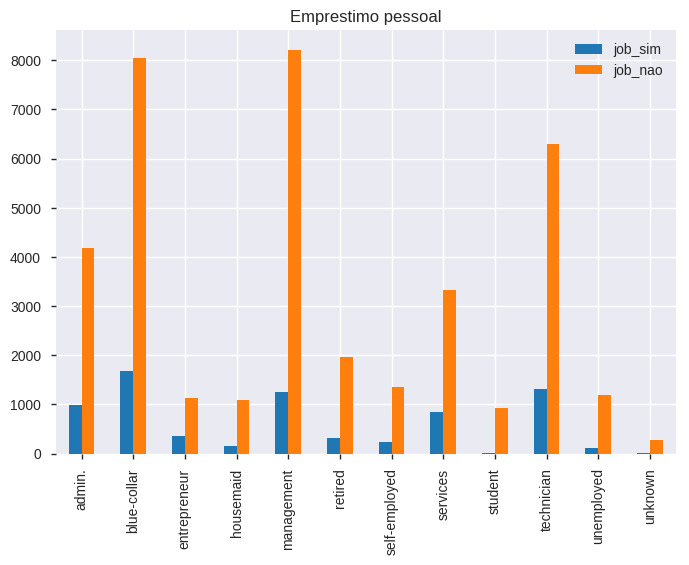

In [100]:
sim_loan = df_bank[df_bank.loan=='yes']
df_sim_loan = pd.DataFrame(sim_loan['job'].value_counts())
nao_loan = df_bank[df_bank.loan=='no']
df_nao_loan = pd.DataFrame(nao_loan['job'].value_counts())
df_loan = pd.concat([df_sim_loan, df_nao_loan], axis=1)
df_loan.columns = ['job_sim', 'job_nao']
df_loan['total'] = df_loan.job_sim+df_loan.job_nao
df_loan['job_sim%'] = df_loan.job_sim/df_loan.total
df_loan['job_nao%'] = df_loan.job_nao/df_loan.total
df_plot_loan = df_loan[['job_sim','job_nao']]
df_plot_loan.plot.bar(title='Emprestimo pessoal')

/home/soutes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


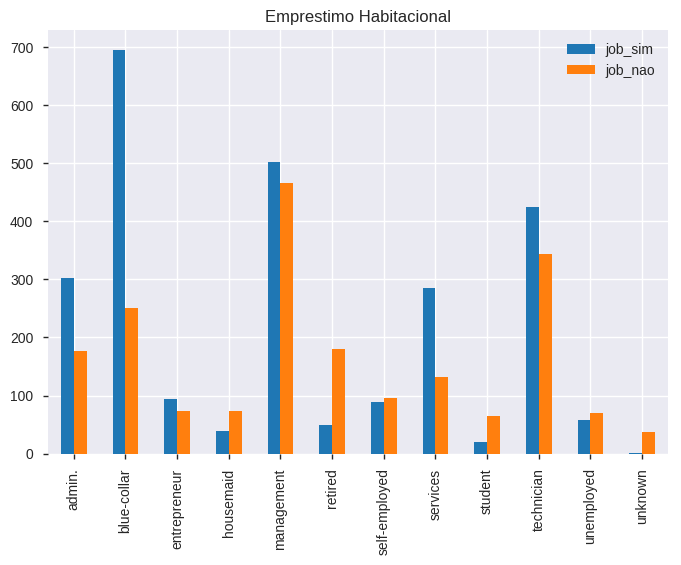

In [27]:
sim_housing = df_bank[df_bank.housing=='yes']
df_sim_housing = pd.DataFrame(sim_housing['job'].value_counts())
nao_housing = df_bank[df_bank.housing=='no']
df_nao_housing = pd.DataFrame(nao_housing['job'].value_counts())
df_housing = pd.concat([df_sim_housing, df_nao_housing], axis=1)
df_housing.columns = ['job_sim', 'job_nao']
df_housing['total'] = df_housing.job_sim+df_housing.job_nao
df_housing['job_sim%'] = df_housing.job_sim/df_housing.total
df_housing['job_nao%'] = df_housing.job_nao/df_housing.total
df_plot_housing = df_housing[['job_sim','job_nao']]
df_plot_housing.plot.bar(title='Emprestimo Habitacional')

In [101]:
df_housing

,job_sim,job_nao,total,job_sim%,job_nao%
admin.,302,176,478,0.631799,0.368201
blue-collar,695,251,946,0.734672,0.265328
entrepreneur,94,74,168,0.559524,0.440476
housemaid,39,73,112,0.348214,0.651786
management,503,466,969,0.519092,0.480908
retired,50,180,230,0.217391,0.782609
self-employed,88,95,183,0.480874,0.519126
services,285,132,417,0.683453,0.316547
student,20,64,84,0.238095,0.761905
technician,424,344,768,0.552083,0.447917


In [102]:
# 1 -Blue-colar tem mais tendência a pegar empréstimo para habitação.
# Isso pode ser visto no gráfico de barras, entitulado Empréstimo Habitacional e no df_housing, coluna job_sim%, 
# que deixa claro que cerca de 73% desses trabalhadores, solicitam tal empréstimo.

# 2 - Fazendo uma relação entre o número de contato e sucesso da campanha quais são os pontos relevantes a serem observados?

In [103]:
df_bank_sim = df_bank[(df_bank.y=='yes')]
df_bank_sim_pdays = df_bank_sim[(df_bank_sim.pdays!=-1)]
df_bank_sim_pdays.shape[0]/df_bank_sim.shape[0]

0.3601815087918321

In [104]:
df_bank_nao = df_bank[(df_bank.y=='no')]
df_bank_nao_pdays = df_bank_nao[(df_bank_nao.pdays!=-1)]
df_bank_nao_pdays.shape[0]/df_bank_nao.shape[0]

0.15911026501678271

In [105]:
# 2 - A diferença das pessoas que tiveram contato antes entre os de resposta YES é mais que o dobro entre as de respostas NO

In [106]:
display(df_bank[df_bank.pdays==-1]['y'].value_counts()/df_bank[df_bank.pdays==1]['y'].value_counts().sum())
display(df_bank[df_bank.pdays!=-1]['y'].value_counts()/df_bank[df_bank.pdays!=1]['y'].value_counts().sum())

no     2238.0
yes     225.6
Name: y, dtype: float64

no     0.140543
yes    0.042150
Name: y, dtype: float64

In [107]:
# 2- Em termos de porcentagem, quem recebeu o primeiro contato, aderiu a 15% a menos a campanha

In [108]:
display(df_bank_sim_pdays.duration.mean())
display(df_bank_nao_pdays.duration.mean())

407.25984251968504

215.99023929471034

In [109]:
# 2 - As pessoas que fizeram o depósito (variável_y) e estão no segundo (ou superior) contato
# demoraram mais, em media, ao telefone do que aquelas que não compraram  e estão no segundo contato. 
# Isso nos leva a crer que o tempo que a atendente (pessoas que fez o contato) passou conversando com o cliente
# pode ter influenciado na decisão.

In [110]:
display(df_bank_sim_pdays.campaign.mean())
display(df_bank_nao_pdays.campaign.mean())

1.7879265091863517

2.1366498740554154

In [111]:
# As pessoas que não contraram receberam, em média, mais contatos na campanha

In [112]:
display(df_bank[df_bank.campaign>1]['y'].value_counts()/df_bank[df_bank.campaign>1].y.value_counts().sum())
display(df_bank[df_bank.campaign==1]['y'].value_counts()/df_bank[df_bank.campaign==1].y.value_counts().sum())

no     0.901399
yes    0.098601
Name: y, dtype: float64

no     0.854024
yes    0.145976
Name: y, dtype: float64

# 3 - Baseando-se nos resultados dessa campanha qual o número médio e o máximo de ligação que você indica para otimizar a adesão?

In [113]:
df_bank_sim_pdays.campaign.mean()

1.7879265091863517

In [114]:
df_bank_sim_pdays.campaign.max()

11

In [115]:
# 3 - A média seria de 1.85 e 9 é o máximo de ligações.

# 4 - O resultado da campanha anterior tem relevância na campanha atual?

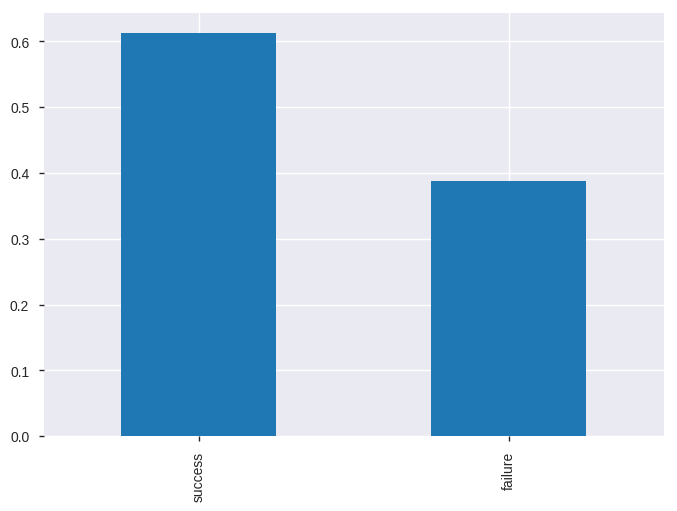

In [116]:
df_bank_poutcome_sim = df_bank_sim[(df_bank_sim.poutcome=='success') | (df_bank_sim.poutcome=='failure')]
df_bank_poutcome_sim = df_bank_poutcome_sim.poutcome.value_counts()
total = df_bank_poutcome_sim.sum()
df_bank_poutcome_sim = df_bank_poutcome_sim/total
df_bank_poutcome_sim.plot.bar()
plt.show()

In [117]:
# 4 - Sim. Percebe-se que, o resultado da campanha anterior influencia na campanha atual. 
# Considerando apenas os clientes que se sabe que tiveram sucesso ou falha (desconsiderando unknow e outros):
# dentre os que tiveram sucesso nessa campanha, os que tiveram sucesso na anterior é maioria.

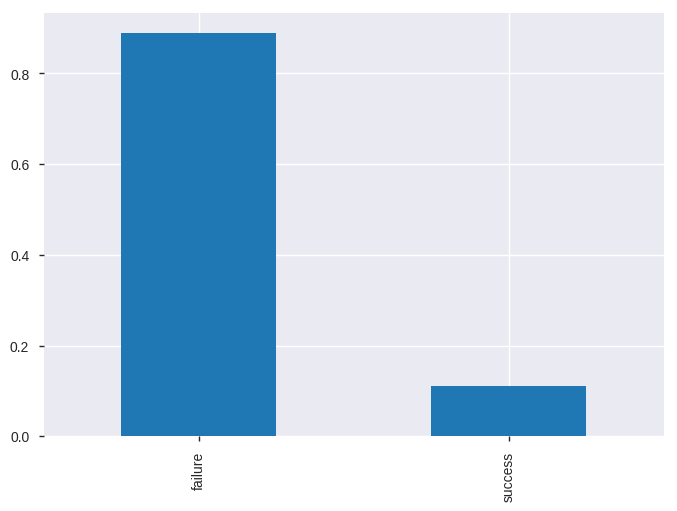

In [118]:
df_bank_poutcome_nao = df_bank_nao[(df_bank_nao.poutcome=='success') | (df_bank_nao.poutcome=='failure')]
df_bank_poutcome_nao = df_bank_poutcome_nao.poutcome.value_counts()
total = df_bank_poutcome_nao.sum()
df_bank_poutcome_nao = df_bank_poutcome_nao/total
df_bank_poutcome_nao.plot.bar()
plt.show()

In [119]:
# O mesmo acontece dentre os que tiveram fracasso. Ou seja, dentre os que tiveram fracasso nessa campanha
# os que tiveram fracasso na antererior é maioria.

# 5 - Qual o fator determinante para que o banco exija um seguro de crédito?

In [120]:
# Pergunta não compreendida.

# 6 - Quais são as caracteristicas mais proeminentes de um cliente que possua empréstimo imobiliário?

In [121]:
nao_housing

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
12,36,technician,married,tertiary,no,1109,no,no,cellular,13,aug,328,2,-1,0,unknown,no
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
15,40,management,married,tertiary,no,194,no,yes,cellular,29,aug,189,2,-1,0,unknown,no
16,56,technician,married,secondary,no,4073,no,no,cellular,27,aug,239,5,-1,0,unknown,no
19,31,services,married,secondary,no,132,no,no,cellular,7,jul,148,1,152,1,other,no
21,42,management,divorced,tertiary,no,16,no,no,cellular,19,nov,140,3,-1,0,unknown,no
22,44,services,single,secondary,no,106,no,no,unknown,12,jun,109,2,-1,0,unknown,no
23,44,entrepreneur,married,secondary,no,93,no,no,cellular,7,jul,125,2,-1,0,unknown,no


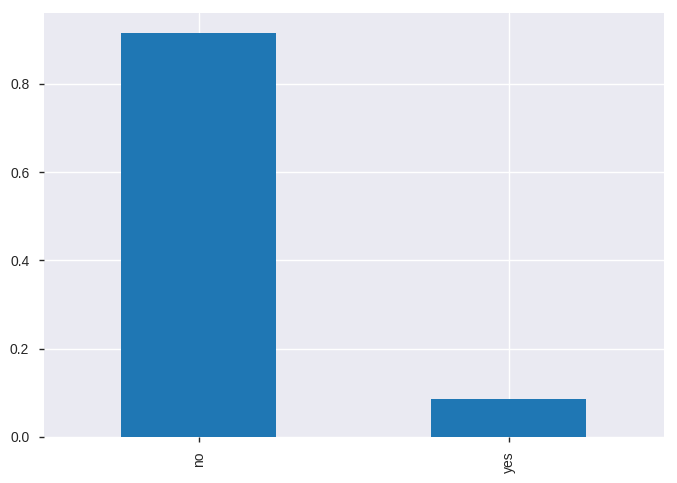

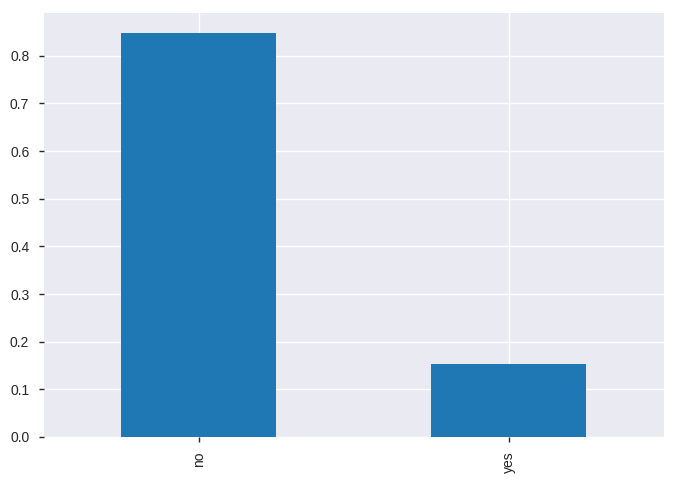

In [122]:
# Apesar do pedido ser apenas para quem fez o empréstimo, estou mostrando também os valores de quem não o fez
# para comparação. Caso o comportamento seja igual nas duas situações, ele não pode ser considerado
# proeminente em uma delas.

# Dentre os clientes que pediram empréstimo imobiliário, mais de 90% não depositou (sucesso na campanha)
(sim_housing['y'].value_counts()/sim_housing['y'].value_counts().sum()).plot.bar()
plt.show()
# Enquanto dentre os que não tiveram empréstimo, 'apenas' 84% não fez o deposito
(nao_housing['y'].value_counts()/nao_housing['y'].value_counts().sum()).plot.bar()
plt.show()

In [123]:
teste_sim = (sim_housing['y'].value_counts()/sim_housing['y'].value_counts().sum())
teste_nao = (nao_housing['y'].value_counts()/nao_housing['y'].value_counts().sum())

In [124]:
teste_sim

no     0.914029
yes    0.085971
Name: y, dtype: float64

In [125]:
teste_nao

no     0.846585
yes    0.153415
Name: y, dtype: float64

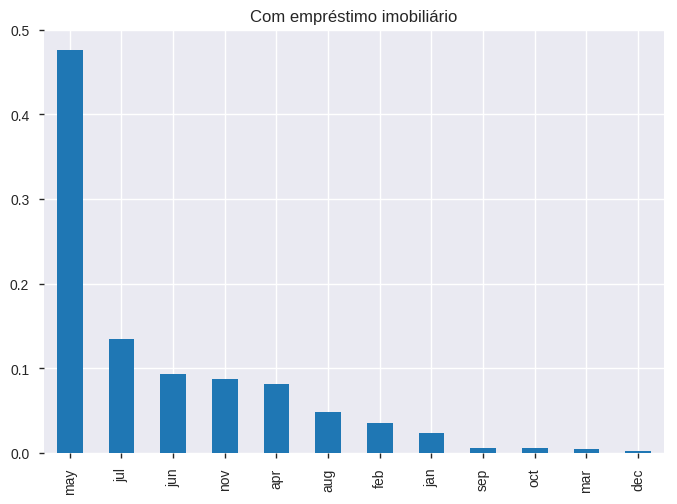

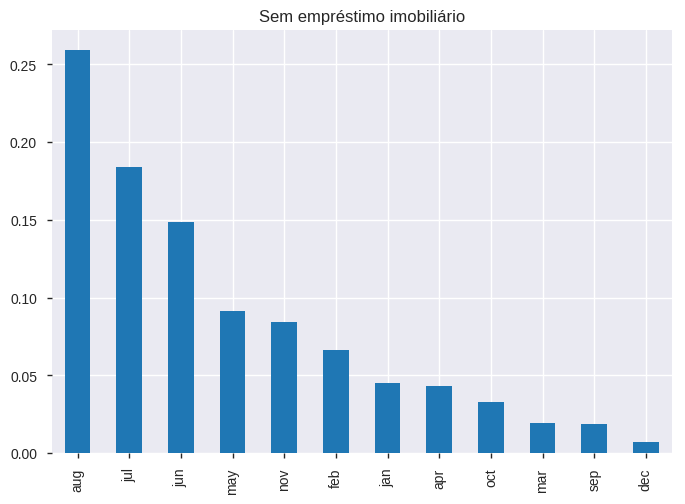

In [126]:
# 6 - Dentre os que pediram empréstimo imobiliário, quase 50% tiveram o último contato em maio
(sim_housing['month'].value_counts()/sim_housing['month'].value_counts().sum()).plot.bar(title='Com empréstimo imobiliário')
plt.show()
# Enquanto os que não tiveram empréstimo, quase 50% tiveram o último contato em agosto
(nao_housing['month'].value_counts()/nao_housing['month'].value_counts().sum()).plot.bar(title='Sem empréstimo imobiliário')
plt.show()

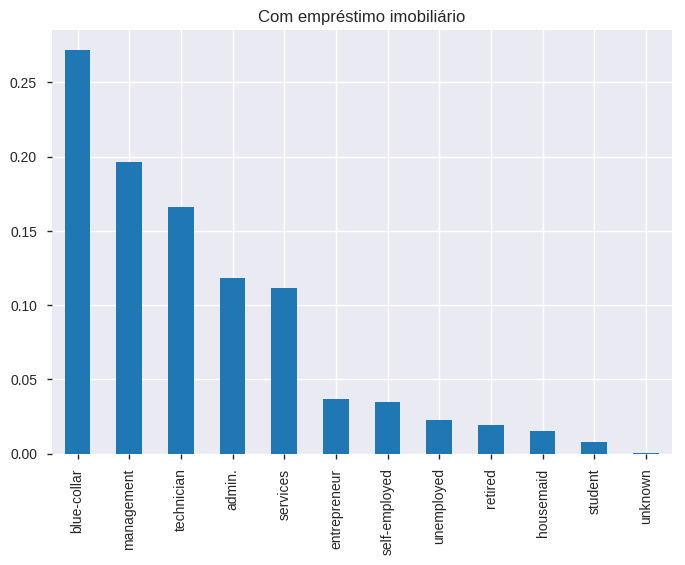

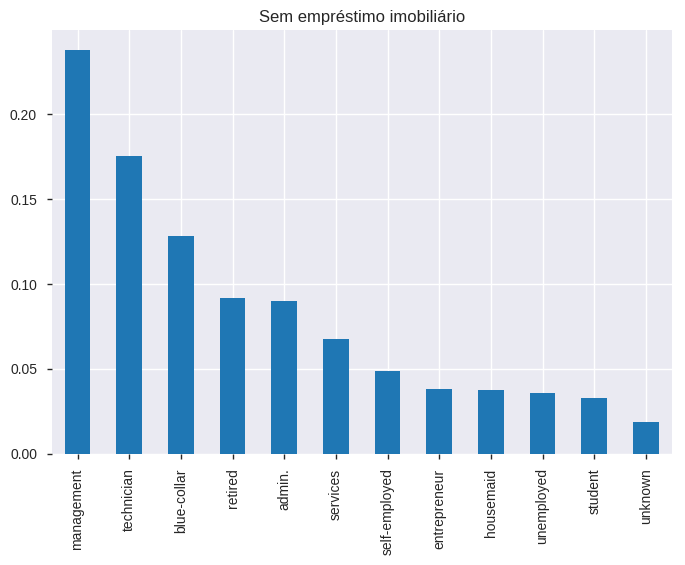

In [127]:
# 6 - Dentre os que pediram empréstimo imobiliário, quase 30% é trabalhador blue-colar (profissão com maior %)
(sim_housing['job'].value_counts()/sim_housing['job'].value_counts().sum()).plot.bar(title='Com empréstimo imobiliário')
plt.show()
# Enquanto os que não tiveram empréstimo, quase 30% é gerente (profissão com maior %)
(nao_housing['job'].value_counts()/nao_housing['job'].value_counts().sum()).plot.bar(title='Sem empréstimo imobiliário')
plt.show()

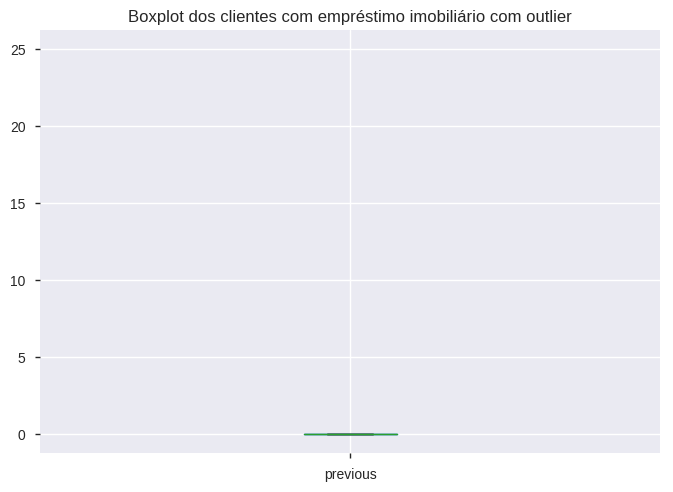

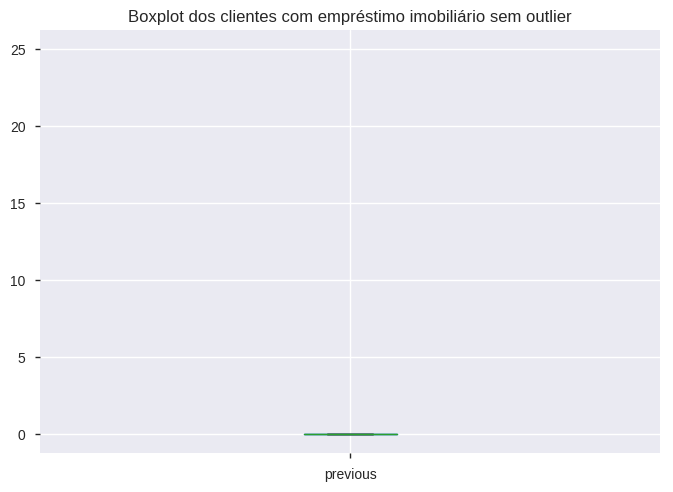

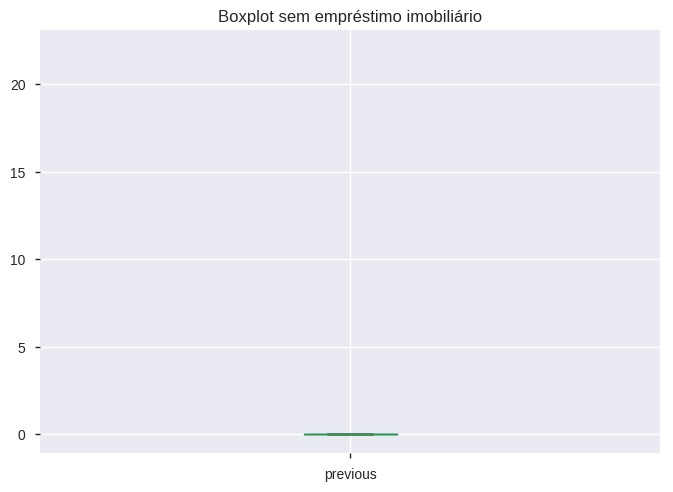

In [128]:
# 6 - Dentre os que pediram empréstimo imobiliário, existe uma pessoa que recebeu 275 contatos antes dessa campanha
sim_housing.previous.plot.box(title='Boxplot dos clientes com empréstimo imobiliário com outlier')
plt.show()
sim_housing[sim_housing.previous<275].previous.plot.box(title='Boxplot dos clientes com empréstimo imobiliário sem outlier')
plt.show()
nao_housing.previous.plot.box(title='Boxplot sem empréstimo imobiliário')
plt.show()

In [130]:
display(sim_housing.previous.mean())
display(nao_housing.previous.mean())

0.5998436889409926

0.46788990825688076

In [131]:
# 6 - Dentre os que tiveram emprestimo, apenas 8% fizeram o deposito
display(sim_housing[sim_housing.y=='yes'].shape[0]/sim_housing.shape[0])
display(sim_housing[sim_housing.y=='no'].shape[0]/sim_housing.shape[0])
# 6 - Dentre os que não tiveram emprestimo, apenas 15% fizeram o deposito
display(nao_housing[nao_housing.y=='yes'].shape[0]/nao_housing.shape[0])
display(nao_housing[nao_housing.y=='no'].shape[0]/nao_housing.shape[0])

0.08597108245408362

0.9140289175459164

0.15341488277268095

0.8465851172273191

In [135]:
numericos = sim_housing[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
categoricos = sim_housing[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']]
categoricos = pd.get_dummies(categoricos)
X = pd.concat([numericos, categoricos], axis=1)
y = sim_housing.y

Feature Ranking:


'1. feature duration (0.260431)'

'2. feature day (0.159560)'

'3. feature age (0.096068)'

'4. feature pdays (0.063420)'

'5. feature poutcome_success (0.043208)'

'6. feature month_aug (0.041023)'

'7. feature balance (0.040322)'

'8. feature marital_single (0.033303)'

'9. feature job_entrepreneur (0.023609)'

'10. feature campaign (0.023532)'

'11. feature month_mar (0.021778)'

'12. feature job_management (0.020890)'

'13. feature contact_cellular (0.019590)'

'14. feature poutcome_other (0.016695)'

'15. feature job_admin. (0.016422)'

'16. feature job_retired (0.016275)'

'17. feature month_dec (0.015873)'

'18. feature month_nov (0.014342)'

'19. feature education_primary (0.013260)'

'20. feature marital_divorced (0.011872)'

'21. feature marital_married (0.011872)'

'22. feature previous (0.009107)'

'23. feature month_apr (0.008904)'

'24. feature education_secondary (0.008904)'

'25. feature month_oct (0.005580)'

'26. feature month_sep (0.004160)'

'27. feature job_self-employed (0.000000)'

'28. feature job_services (0.000000)'

'29. feature job_technician (0.000000)'

'30. feature job_housemaid (0.000000)'

'31. feature job_blue-collar (0.000000)'

'32. feature job_student (0.000000)'

'33. feature poutcome_unknown (0.000000)'

'34. feature job_unemployed (0.000000)'

'35. feature contact_unknown (0.000000)'

'36. feature poutcome_failure (0.000000)'

'37. feature month_may (0.000000)'

'38. feature month_jun (0.000000)'

'39. feature month_jul (0.000000)'

'40. feature month_jan (0.000000)'

'41. feature month_feb (0.000000)'

'42. feature contact_telephone (0.000000)'

'43. feature job_unknown (0.000000)'

'44. feature loan_yes (0.000000)'

'45. feature loan_no (0.000000)'

'46. feature housing_yes (0.000000)'

'47. feature default_yes (0.000000)'

'48. feature default_no (0.000000)'

'49. feature education_unknown (0.000000)'

'50. feature education_tertiary (0.000000)'

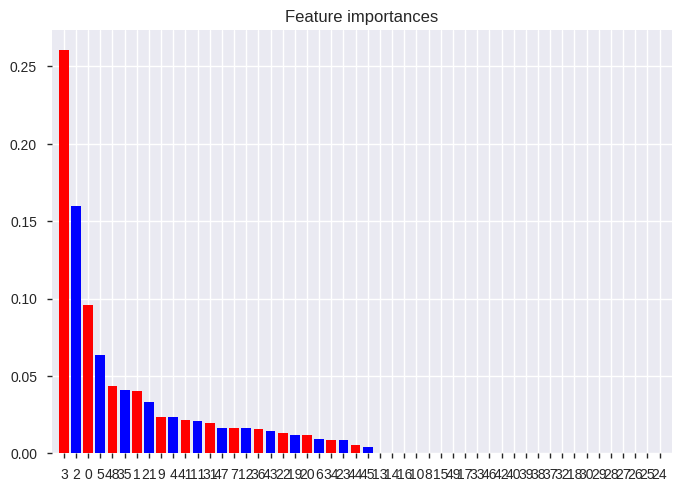

In [139]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")

for f in range(X.shape[1]):
    display("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color=['red', 'blue'], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [142]:
numericos = nao_housing[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
categoricos = nao_housing[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']]
categoricos = pd.get_dummies(categoricos)
X = pd.concat([numericos, categoricos], axis=1)
y = nao_housing.y

Feature Ranking:


'1. feature duration (0.270683)'

'2. feature age (0.120726)'

'3. feature pdays (0.093973)'

'4. feature poutcome_success (0.089617)'

'5. feature campaign (0.063199)'

'6. feature balance (0.060822)'

'7. feature day (0.049987)'

'8. feature month_apr (0.021903)'

'9. feature month_oct (0.020116)'

'10. feature job_unknown (0.020079)'

'11. feature month_nov (0.019568)'

'12. feature marital_married (0.016370)'

'13. feature contact_cellular (0.016295)'

'14. feature month_feb (0.015437)'

'15. feature job_self-employed (0.015133)'

'16. feature job_retired (0.012441)'

'17. feature month_jul (0.011705)'

'18. feature marital_divorced (0.010959)'

'19. feature marital_single (0.009729)'

'20. feature job_housemaid (0.009480)'

'21. feature education_secondary (0.008513)'

'22. feature job_technician (0.007261)'

'23. feature education_tertiary (0.006810)'

'24. feature month_mar (0.006039)'

'25. feature month_sep (0.005843)'

'26. feature month_jan (0.005518)'

'27. feature job_admin. (0.003881)'

'28. feature month_may (0.003648)'

'29. feature education_unknown (0.003251)'

'30. feature job_student (0.001015)'

'31. feature default_no (0.000000)'

'32. feature job_management (0.000000)'

'33. feature poutcome_other (0.000000)'

'34. feature poutcome_failure (0.000000)'

'35. feature previous (0.000000)'

'36. feature job_blue-collar (0.000000)'

'37. feature job_entrepreneur (0.000000)'

'38. feature month_jun (0.000000)'

'39. feature month_dec (0.000000)'

'40. feature job_services (0.000000)'

'41. feature month_aug (0.000000)'

'42. feature job_unemployed (0.000000)'

'43. feature contact_unknown (0.000000)'

'44. feature contact_telephone (0.000000)'

'45. feature loan_yes (0.000000)'

'46. feature loan_no (0.000000)'

'47. feature education_primary (0.000000)'

'48. feature housing_no (0.000000)'

'49. feature default_yes (0.000000)'

'50. feature poutcome_unknown (0.000000)'

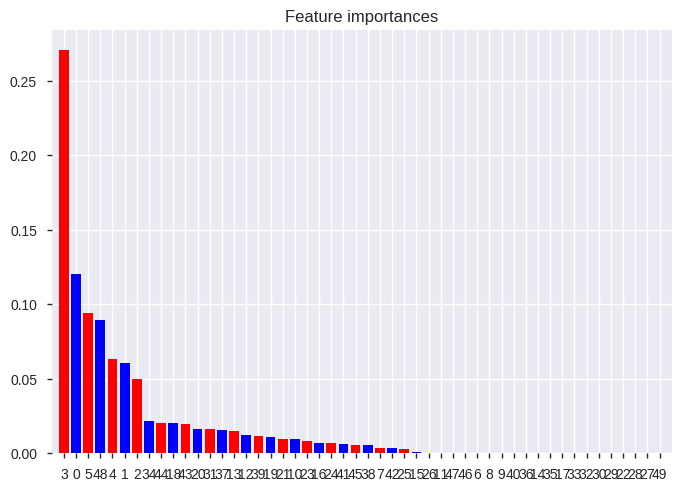

In [143]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")

for f in range(X.shape[1]):
    display("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color=['red', 'blue'], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [6]:
numericos = nao_housing[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
categoricos = nao_housing[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']]
categoricos = pd.get_dummies(categoricos)
X = pd.concat([numericos, categoricos], axis=1)
y = nao_housing.y

In [146]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
ada.fit(X_train, y_train)
previsto = ada.predict(X_test)
score = ada.score(X_test,y_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, previsto))
print()
print("Classification Report")
print(classification_report(y_test, previsto))
print()
print("Score")
print(score)

Confusion Matrix:
[[1091   74]
 [ 124   84]]

Classification Report
              precision    recall  f1-score   support

          no       0.90      0.94      0.92      1165
         yes       0.53      0.40      0.46       208

   micro avg       0.86      0.86      0.86      1373
   macro avg       0.71      0.67      0.69      1373
weighted avg       0.84      0.86      0.85      1373


Score
0.8557902403495994


In [45]:
#Tratamento dos dados

# Exclui todos os NaN
# df_bank.dropna(inplace=True)

#Conversão para númericos
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_bank["sim"]=le.fit_transform(df_bank["sim"])

X = df_bank.drop(["sim"], axis = 1)
def muda_resultado(valor):
    if valor=='no':
        return 0
    else:
        return 1
df_bank.sim = df_bank.sim.apply(muda_resultado)
y = df_bank.sim